In [4]:
import sys
print('Python: {}'.format(sys.version))
import scipy
print('scipy: {}'.format(scipy.__version__))
import numpy
print('numpy: {}'.format(numpy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
scipy: 1.9.1
numpy: 1.21.5
matplotlib: 3.5.2
pandas: 1.4.4
sklearn: 1.0.2


In [112]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [113]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal -length', 'petal-width', 'class']
dataset = pandas.read_csv("./iris.data", names=names)

In [114]:
print(dataset.shape)

(150, 5)


In [115]:
print(dataset.head(30))

    sepal-length  sepal-width  petal -length  petal-width        class
0            5.1          3.5            1.4          0.2  Iris-setosa
1            4.9          3.0            1.4          0.2  Iris-setosa
2            4.7          3.2            1.3          0.2  Iris-setosa
3            4.6          3.1            1.5          0.2  Iris-setosa
4            5.0          3.6            1.4          0.2  Iris-setosa
5            5.4          3.9            1.7          0.4  Iris-setosa
6            4.6          3.4            1.4          0.3  Iris-setosa
7            5.0          3.4            1.5          0.2  Iris-setosa
8            4.4          2.9            1.4          0.2  Iris-setosa
9            4.9          3.1            1.5          0.1  Iris-setosa
10           5.4          3.7            1.5          0.2  Iris-setosa
11           4.8          3.4            1.6          0.2  Iris-setosa
12           4.8          3.0            1.4          0.1  Iris-setosa
13    

In [116]:
print(dataset.describe())

       sepal-length  sepal-width  petal -length  petal-width
count    150.000000   150.000000     150.000000   150.000000
mean       5.843333     3.054000       3.758667     1.198667
std        0.828066     0.433594       1.764420     0.763161
min        4.300000     2.000000       1.000000     0.100000
25%        5.100000     2.800000       1.600000     0.300000
50%        5.800000     3.000000       4.350000     1.300000
75%        6.400000     3.300000       5.100000     1.800000
max        7.900000     4.400000       6.900000     2.500000


In [117]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


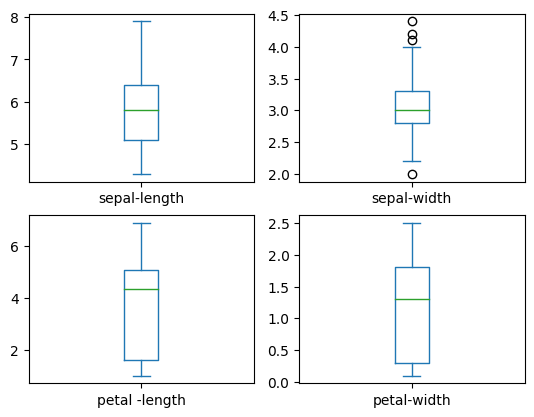

In [118]:
dataset.plot(kind = 'box',subplots=True, layout = (2,2),sharex=False, sharey= False)
plt.show()

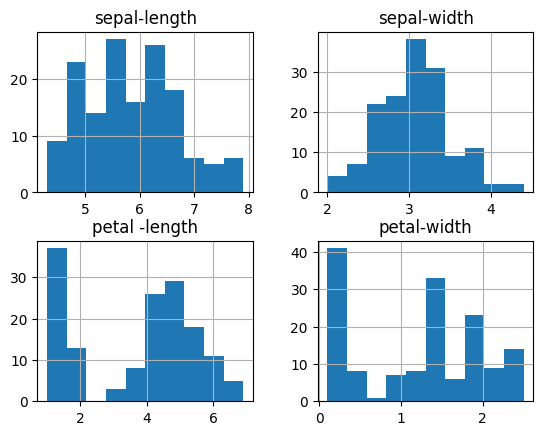

In [119]:
dataset.hist();
plt.show();

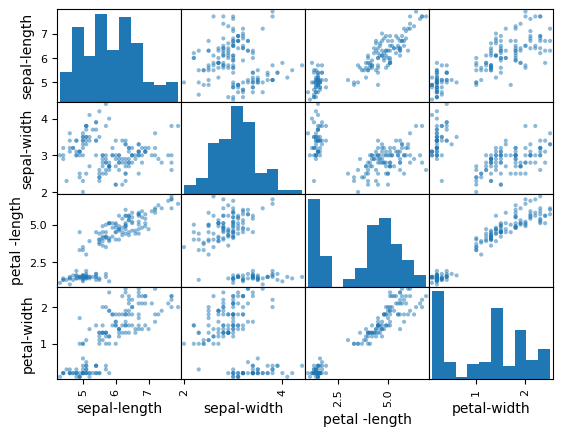

In [120]:
scatter_matrix(dataset);
plt.show()

In [121]:
array = dataset.values
X = array[:,0:4];
Y = array[:,4];
validation_size = 0.20;
seed = 6;
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=validation_size, random_state=seed)

In [122]:
seed = 6
scoring = 'accuracy'

In [123]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


c:\Users\sridh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sridh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LR: 0.958333 (0.041667)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.958333 (0.041667)
NB: 0.966667 (0.040825)
SVM: 0.941667 (0.053359)
